Objective:
    
    Use Kaggle data to input a list of ingredients and retrieve recipes that can be made from them
    This is later used in program that reads an Image's text and returns possible recipes based on ingredients listed on the       paper. Also returns Dietary information regarding the Combined Ingredients used in the meal
    
    
    
    
    
   
#Use possible recipes, take all ingredients used in it from the data set and return a graph or visualized information of Nutrients in the meal
#(GENERATE A PDF WITH ALL THIS INFO, CLEAN Image of meal, ingredients and Nutrition Graphs)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

import ast #The lists of ingredients were shown as strings so needed this to change e.g. "[1,2,3]" to just [1,2,3] list type

# 1. Organizing Data for our purpose

In [2]:
ingredientsDF = pd.read_csv('ingredients_ConvertedFromPKL_File.csv')
rawRecipesDF = pd.read_csv('RAW_recipes.csv') 
rawInteractionsDF = pd.read_csv('RAW_interactions.csv')

In [3]:
ingredientsDF.head(4)

,Unnamed: 0,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308


In [4]:
rawInteractionsDF.head(2)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."


In [5]:
rawRecipesDF.head(6)
#Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat
#PDV is Percent Daily Value (% acquired from the food relative to the amount needed for a day (Like DRI))

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4


In [6]:
recipes= rawRecipesDF.copy()
recipes = recipes[['name','id','minutes','nutrition','n_steps','steps','description','ingredients','n_ingredients']]

In [7]:
# Need to make sure user input ingredients can be detected as the raw version or the replaced version in ingredientsDF
# then convert to raw_ingr if it were under 'replaced' and find recipes that have it in recipes data frame

In [8]:
recipes.drop([144074,109624],inplace = True) #Granola bars recipe. Minutes very long...outlier so just dropped

In [9]:
mappingDict = dict(ingredientsDF[['raw_ingr','replaced']].values) 
mappingDictBack=dict(ingredientsDF[['replaced','raw_ingr']].values) #Since no way to use key to get value (only key to val)
#This creates a dictionary with keys = 'raw_ingr' column and vals = 'replaced' column
#Now can use this in recipes to check for keys and map to a value in the newly created column

#mapping  (REMOVE # TO SEE WHAT THE MAPPING DICTIONARY LOOKS LIKE)

In [10]:
def mapInnerList(innerList):
    for i in range(len(innerList)):
        innerList[i]=mappingDict.get(innerList[i],innerList[i])
    return innerList    


###########VERY IMPORTANT TO RETURN THE LIST...It wasnt working when you didn't put the return at the end



#value=dictName.get(key,"replace by this if key not found") ......GET Value by passing in key, if not found, replace by second param
        #SEE: https://stackoverflow.com/questions/6130768/return-none-if-dictionary-key-is-not-available

In [11]:
recipes['ingredients']=rawRecipesDF['ingredients'].apply(ast.literal_eval)
recipes['baseIngrType']= recipes['ingredients'].apply(lambda inLst: mapInnerList(inLst)) 


#apply changes the original column too so this was only way I could find to change back ingredients column to original form before mapping


#.apply will iterate through each thing in the Series
#which are lists in this case. (Each value in the Series is a list, so for this 'inLst', apply lambda expression above)
#basically use mapInnerList function on each of these lists
#gentian root Error so NOT WORKING... FIX

In [12]:
#Previous .apply will make both baseIngrType and ingredients column the same so revert ingredients back from original
recipes['ingredients']=rawRecipesDF['ingredients'].apply(ast.literal_eval)
recipes['nutrition']=recipes['nutrition'].apply(ast.literal_eval) #change lists '[chicken]' to [chicken]
recipes['steps']=recipes['steps'].apply(ast.literal_eval) 

#ingredients column had a list as a string type so convert here
#CANT DO ast.literal_eval(recipes['ingredients']) since that's a series
#the apply method applies the function to EACH thing in the SERIES INDIVIDUALLY, so it works
# see https://stackoverflow.com/questions/44672561/convert-string-representation-of-list-into-list



#Lower case ingredients column for searches later on (in case user inputs capital letters)
recipes['ingredients']=recipes['ingredients'].apply(lambda itemsLst: [x.lower() for x in itemsLst])#list comprehension inside lambda expression inside a apply for a series of a dataframe!!!!


Taking the Series (Column) from recipes called 'ingredients'
and mapping it to new 'baseIngrType' column using the mapping dictionary created (e.g. a key in the ingredients column
called 'boston lettuce' will be mapped to the value in the dictionary of 'lettuce' and this value will be put alongside it 
in the new 'baseIngrType' col BUT NEEDED TO CREATE 'mapInnerList' function since mapping[listType] gives error (See below)

In [13]:
#ADDED Avg rating(rating) and Num of Ratings columns(review)
#https://datacarpentry.org/python-ecology-lesson/05-merging-data/ SEE FOR PYTHON SQL stuff
avgRatings=rawInteractionsDF.groupby(by='recipe_id').mean()['rating'].reset_index()
numRatings = rawInteractionsDF.groupby(by='recipe_id').count()['review'].reset_index()
ratingsAggregated=pd.merge(left=avgRatings,right=numRatings,left_on='recipe_id',right_on='recipe_id')
ratingsAggregated
recipes=pd.merge(left=recipes,right=ratingsAggregated,how="left",left_on='id',right_on='recipe_id')


In [14]:
recipes.head()

,name,id,minutes,nutrition,n_steps,steps,description,ingredients,n_ingredients,baseIngrType,recipe_id,rating,review
0,arriba baked winter squash mexican style,137739,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,"[winter squash, mexican seasoning, mixed spice...",137739,5.0,3
1,a bit different breakfast pizza,31490,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,"[pizza crust, sausage, egg, milk, salt and pep...",31490,3.5,4
2,all in the kitchen chili,112140,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,"[ground beef, yellow onion, diced tomato, toma...",112140,4.0,1
3,alouette potatoes,59389,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,"[cheese, new potato, shallot, parsley, tarrago...",59389,4.5,2
4,amish tomato ketchup for canning,44061,190,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,"[tomato juice, apple cider vinegar, sugar, sal...",44061,5.0,1


# Do EDA at the end when have to generate graphs, pdf and info on output Recipes... Figure out how to use USER INPUT to generate DECENT INGREDIENT MATCHIN RECIPES
Doesn't have to have all ingredients. Do the thing where you take recipes with ALL those ingredients
and keep reducing recipes by n_ingredients until recipes have +- X ingredients from the input ingredients
ALSO REQUIRE A MINIMUM AMOUNT OF INGREDIENTS INPUT

In [15]:
#Checks in both 'ingredients' and 'baseIngrType' for recipes that passed in ingredients use (e.g. boston lettuce and lettuce both work)
def getRecipes(ingredients):
    
    ingredients =[ings.lower() for ings in ingredients]#Lower case everything first since data has all lower cases using list comprehension: SEE: https://stackoverflow.com/questions/1801668/convert-a-python-list-with-strings-all-to-lowercase-or-uppercase
    
    ingredientsA=ingredients
    ingredientsB=ingredients

    #INGREDIENTS column search
    for i in range(len(ingredientsB)): #e.g. getRecipes['chicken'] will search AFTER converting chicken using dictionaries map and mapBack
        ingredientsB[i]=mappingDictBack.get(ingredientsB[i],ingredientsB[i]) #mapping the ingredients BACK so can search in baseIngrType col
    #USE back mapping since if passed in baseIngrType words, want to back it to ingredients version, then search
    baseIngRecipes=recipes[recipes['ingredients'].apply(lambda inLst: set(ingredientsB)<=set(inLst))]
    
    #BASEINGRTYPE column search
    for i in range(len(ingredientsA)):
            ingredientsA[i]=mappingDict.get(ingredientsA[i],ingredientsA[i]) #mapping the ingredients so can search in baseIngrType col
        
    rawIngRecipes=recipes[recipes['baseIngrType'].apply(lambda inLst: set(ingredientsA)<=set(inLst))]
    
    
    combined=pd.concat([rawIngRecipes,baseIngRecipes]).reset_index()
    combined=combined.drop_duplicates(subset='index')
    try:
        #Results returned
        if(combined.empty and len(ingredients)>1): #No recipes found (maybe because too many ingredients input so too specific)
            print("No recipes found. Please enter one of the ingredients to remove and search again.")
            keepRem = True
            while(keepRem):
                remIng=input()
                ingredients.remove(remIng.lower())
                combined = getRecipes(ingredients) #RECURSION!!!!!!(when it is able to return a val, it COMES BACK TO THIS LINE to run rest)
                keepRem=False #once combined is not empty, returns and turns off ALL THE WHILE LOOPS
        elif(combined.empty and len(ingredients)<=1):#No recipes found and 1 or No ingredient in list(maybe invalid ingredient not found)
            print("No recipes found with passed ingredients or too little ingredients.")
            
        return combined #DONT put this unde a ELSE since the recursion RETURNS a val and when completes the code at any point,
                    #it RETURNS TO WHERE THE RECURSION WAS CALLED and code continues from there. So in our case, when it gets back to getRecipes(ingredients)
                    # want to continue running the code. BUT A ELSE statement wouldn't execute since when it returns, it was in the IF condition
                    #so when IF is executed, else is not
            
    except ValueError:
        print("ValueError BECAUSE invalid input you passed. Only remove ingredients passed in.")
        
        

In [16]:
#######NEW ISSUE: putting in ingredients e.g. ['black beans'], vs. ['black bean'] doesn't give same recipes
#since one of those is in baseIngrType and other is in ingredients column for recipes df.
#

#SOLUTION DONE: see for loops in getRecipes(...)

In [17]:
#getRecipes TEST ########### CONTROLS VERY IMPORTANT...REMEMBER INTERNSHIP
a=getRecipes(['black bean'])
b=getRecipes(['black beans'])

a=list(a['index'])
b=list(b['index'])
a==b #Now black beans and black bean returns the same recipes

True

In [18]:
#getRecipes test2: Check if returns same recipes if in different order inputs
c=getRecipes(['chicken','boston lettuce'])
d=getRecipes(['boston lettuce','chicken'])
c=list(c['index'])
d=list(d['index'])
c==d

True

In [19]:
#getRecipes(['noodles','egg'])

In [20]:
#getRecipes(['xi','x','chicken','food coloring'])

# Exploratory Data Analysis (EDA)

In [21]:
ingredients = ['chicken']
results= getRecipes(ingredients)

In [22]:
(recipes['recipe_id']==recipes['id']).value_counts()

True    231635
dtype: int64

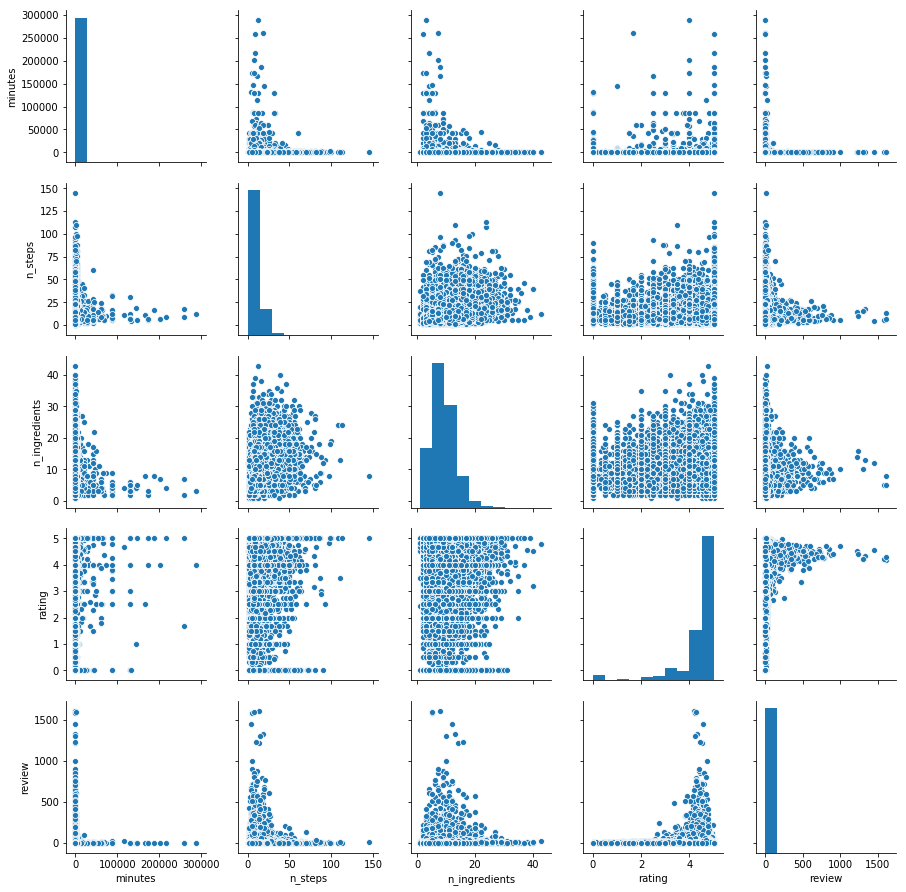

In [23]:
sns.pairplot(recipes[['minutes','n_steps','n_ingredients','rating','review']])



In [24]:
def getRatings():
    avgRatings = rawInteractionsDF.groupby(by='recipe_id').mean()

In [25]:
aDATA=results['nutrition'][0]
aDATA


[969.6, 93.0, 55.0, 83.0, 148.0, 86.0, 7.0]

In [26]:
print("Bar plot ALL IN ONE GRAPH: of nutrient of top 5 rated recipes possible or top<5 if <5, separated BY COLOR...SEE:"+
     "https://matplotlib.org/gallery/lines_bars_and_markers/filled_step.html#sphx-glr-gallery-lines-bars-and-markers-filled-step-py")


print("Also a comparison of Rating vs Nutrients graph (e.g.top 3 recipes in nutritional value have ratings x,y,z)")
### NOT VERY GOOD LOOKING AND FIND A BETTER WAY TO REPRESENT THE DATA...




#https://www.food.com/recipe/magic-chicken-noodle-soup-376813#activity-feed SAMPLE TO CHECK NUTRITIONS WHAT THEY ARE
#label ='Number of Calories,Total Fat (PDV),Sugars (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Total Carbohydrates (PDV)'.split(",")
label ='Total Fat (PDV),Sugars (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Total Carbohydrates (PDV)'.split(",")




 

Bar plot ALL IN ONE GRAPH: of nutrient of top 5 rated recipes possible or top<5 if <5, separated BY COLOR...SEE:https://matplotlib.org/gallery/lines_bars_and_markers/filled_step.html#sphx-glr-gallery-lines-bars-and-markers-filled-step-py
Also a comparison of Rating vs Nutrients graph (e.g.top 3 recipes in nutritional value have ratings x,y,z)


In [27]:
stepTEST=recipes['steps'][0]
def getStepsFromList(innerList):
    for i in range(len(innerList)):
        print("Step "+str(i+1)+": "+innerList[i]+"\n")

In [28]:
getStepsFromList(stepTEST)

Step 1: make a choice and proceed with recipe

Step 2: depending on size of squash , cut into half or fourths

Step 3: remove seeds

Step 4: for spicy squash , drizzle olive oil or melted butter over each cut squash piece

Step 5: season with mexican seasoning mix ii

Step 6: for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece

Step 7: season with sweet mexican spice mix

Step 8: bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin

Step 9: be careful not to burn the squash especially if you opt to use sugar or butter

Step 10: if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking

Step 11: if desired , season with salt



In [29]:
results.sort_values(by=['review','rating'],ascending=False,inplace=True) #Descending sort, #reviews sort first, then rating sort


In [30]:
#Other example of viz
#VISUALIZATION CODE FROM: https://matplotlib.org/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

In [31]:

def BarTopRecipes(results,maxBarsNum=5):
    
    #Copy of results so no issue if any alteration made and TAKING MAX 5 recipes
    topRes= results.copy()
    topRes.sort_values(by=['review','rating'],ascending=False,inplace=True) #DESCENDING BASED ON RATING AND #REVIEWS
    topRes['nutritionNOCAL']=topRes['nutrition'].apply(lambda inLst: inLst[1:])
    topRes= topRes.head(maxBarsNum) #Shows top 5 or less results
    
    #Taking vals for xpositions of bar
    barXpos=np.array([1,2,3,4,5,6])
    topRecipes= topRes[['name','nutrition','nutritionNOCAL']]
    
    #LABELS AND COLORS
    labels='Total Fat (%),Sugars (%),Sodium (%),Protein (%),Saturated Fat (%),Total Carbohydrates (%)'.split(",")
    handles=[]
    colors=['lightblue','orangered','navy','green','purple','plum']
    
    #height of TALLEST BAR
    highestBar=topRecipes['nutritionNOCAL'].apply(lambda inLst: max(inLst)).max()

    #Setting the PLAIN GRAPH FIRST
    plt.figure(figsize=(20,10))
    
    
    #Title
    plt.ylim(top=highestBar+25) #SET YLIM so if highest bar is first recipe, it won't block the title since +20 y space set and title set at +10 (see below)
    plt.text(0.25,highestBar+10,"Nutrition Percentage Daily Value (PDV)" , 
             fontsize=16,
             rotation=0,
             color='Black',fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='salmon', alpha=0.5),
            )

    #Calories numbers and barplot for each recipe
    for i in range(len(topRecipes)):


        plt.bar(x= 8*i + barXpos, height=topRecipes['nutritionNOCAL'].iloc[i], color =colors)
        #Name values
        plt.xticks([num*8 +3.5 for num in range(len(topRecipes))], topRecipes['name'].values,rotation=-60, fontsize=14)

        #Nutrition column since need Calorie number
        topBar=max(topRecipes['nutritionNOCAL'].iloc[i])
        plt.text(8*i +1,topBar+2, str(topRecipes['nutrition'].values[i][0])+" Calories", 
                 fontsize=14, rotation=0,
                 color='teal',fontweight='bold')






    #legend
    for i in range(len(colors)):
        handles.append(mpatches.Patch(color=colors[i], label=labels[i]))

    plt.legend(handles=handles, loc='lower left',bbox_to_anchor=(0, 1.01,10,10),
               ncol=len(colors),fontsize=15)
    
    
    #show
    plt.style.use('fast')
    plt.show()

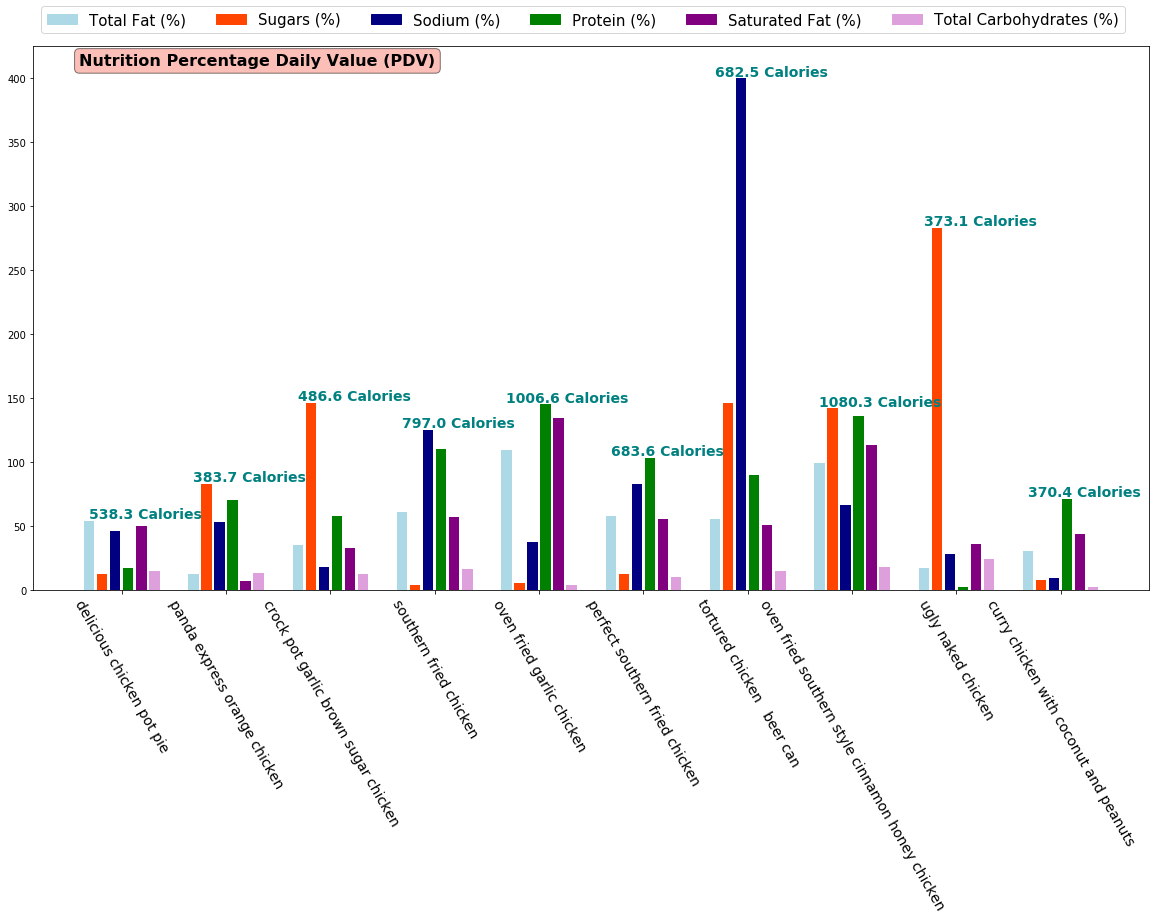

In [32]:
BarTopRecipes(results,10)

In [39]:
def userChooseRecipe(results,maxBarsNum=5,showTopX=15):
    try:
        results.sort_values(by=['review','rating'],ascending=False,inplace=True) #DESCENDING BASED ON RATING AND #REVIEWS
        
        #Display DataFrame and Rename columns to look nicer
        display(
            results[['id','name','minutes','n_steps','n_ingredients','steps','rating','review']].rename(
            columns={'id':'Recipe ID',
                        'name':'Recipe',
                        'minutes':'Cooking Time',
                        'n_steps':'Number of Steps',
                        'n_ingredients':'Number of Ingredients',
                        'steps':'Steps',
                        'rating':'Rating /5',
                        'review':'Number of Ratings'
                       }).head(showTopX)
        )

        #User input and graph display

        BarTopRecipes(results,maxBarsNum)
        print("These are the top recipes found information. Enter the ID of the recipe you wish to make:")


        userPick=int(input())

        #Display steps of selected ID
        if(userPick in results['id'].values):
            getStepsFromList(results[results['id']==userPick]['steps'].iloc[0])
        else:
            print("Could not locate the input ID. CLOSING")
    except ValueError:
        print("Not an integer. CLOSING")
    except:
        print("Some input Error. Remove this else statement and run and do the same inputs to see run-time error.")
    

No recipes found. Please enter one of the ingredients to remove and search again.
h
No recipes found. Please enter one of the ingredients to remove and search again.
y


,Recipe ID,Recipe,Cooking Time,Number of Steps,Number of Ingredients,Steps,Rating /5,Number of Ratings
9,133760,hainanese chicken rice,1465,32,19,[first of all wash the rice then place it on t...,4.681818,22
2,248707,basic fried rice with variations,55,16,38,"[dice or shred meat and vegetables, heat oil i...",4.571429,14
4,227371,chicken shawarma recipe,65,19,19,"[combine all ingredients except for chicken , ...",4.125000,8
7,151591,greek salad with grilled chicken,35,8,16,"[prepare grill or broiler, combine first 8 ing...",5.000000,3
0,362986,all in one roast chicken dinner,100,18,18,[heat oven to 350 deg f / 180 deg celsius use ...,3.333333,3
5,371885,couscous garbanzo salad,15,11,16,"[bring broth to a boil in medium saucepan , an...",5.000000,2
10,466401,indian inspired chicken with raita,50,10,14,"[mix 1 cup yogurt , 2 cloves garlic , salt thr...",5.000000,2
11,35551,indonesian fried rice nasi goreng,25,7,13,[stir the rice with a fork to separate the gra...,5.000000,2
6,391850,delicate cucumber and strawberry tea slices,5,4,7,"[cut cucumber into coin sized slices, finely c...",3.000000,2
3,195246,chicken shawarma quick healthy and simple sa...,25,13,18,[mix boneless and sliced / cubed chicken piece...,0.500000,2


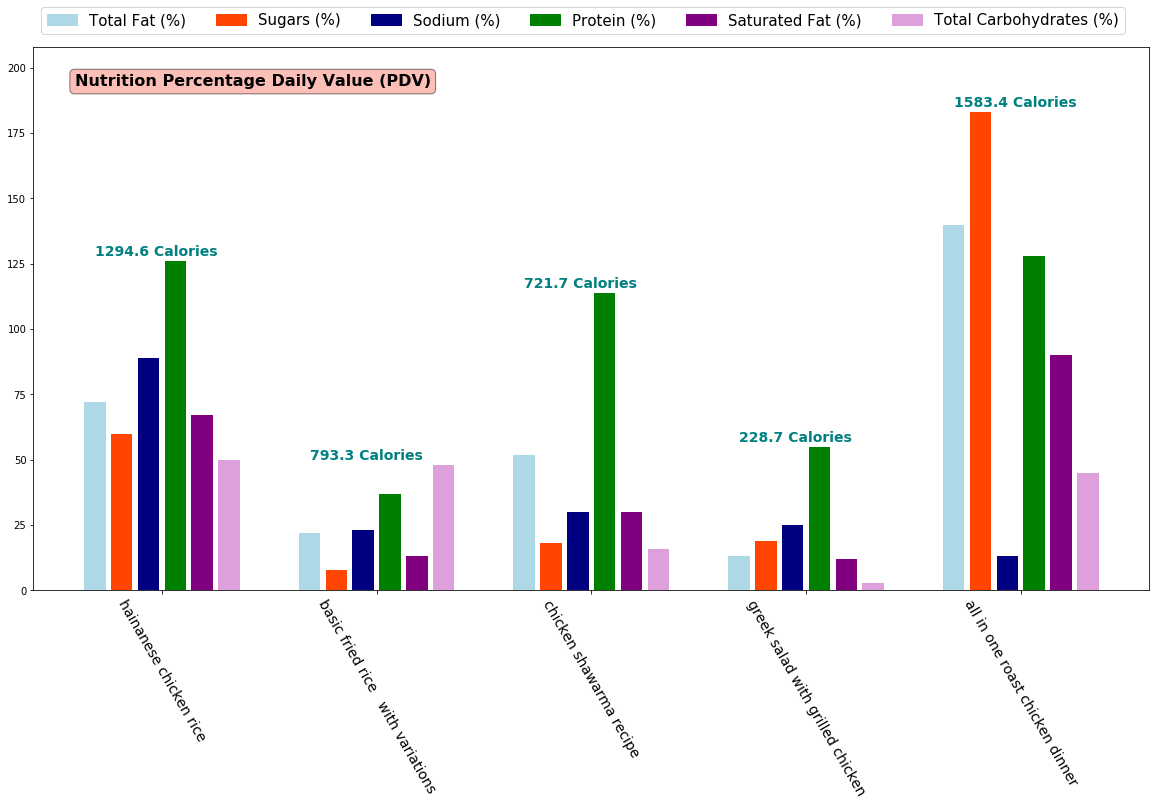

These are the top recipes found information. Enter the ID of the recipe you wish to make:
 133760	
Step 1: first of all wash the rice then place it on to a tea towel or colander to dry

Step 2: then , prepare the chicken

Step 3: bring enough water to boil in a large pot

Step 4: once boil , add in the salt , ginger , garlic and chicken

Step 5: lower the heat and cook chicken for about 20 - 25 minutes , uncovered

Step 6: it is very important to boil the chicken very slowly over low flame

Step 7: turn of flame and cover the pot

Step 8: allow the chicken to steep inside for another 20-25 minutes

Step 9: remove chicken and immerse it into a basin of cold water for 5-6 minutes

Step 10: take chicken out and drain in a colander to drip dry before cutting it into serving pieces

Step 11: while the chicken is drip drying , prepare the rice

Step 12: heat up wok and add in the chicken fat and water

Step 13: bring to a low simmering boil until oil is released from the fat

Step 14: add in

In [40]:
userChooseRecipe(getRecipes(['chicken','salt','cucumber','H','Y']))

,Recipe ID,Recipe,Cooking Time,Number of Steps,Number of Ingredients,Steps,Rating /5,Number of Ratings
0,114204,3 cheese chicken enchiladas,40,11,10,"[heat oven to 350 degrees, in a large bowl , m...",4.250000,8
3,59408,chicken in a hut,28,9,6,"[combine all ingredients except rolls, set asi...",4.750000,4
15,256660,slow cooker chicken azteca,250,10,8,"[place chicken on bottom of crockpot, mix all ...",4.750000,4
11,52186,mexican chicken rice bake,60,6,12,"[blend cottage cheese , cream cheese and sour ...",4.000000,4
1,291251,cheesiest fried chicken empanadas with queso dip,60,17,12,[preheat vegetable oil in a deep-fryer to 350 ...,4.666667,3
2,330329,chicken cream cheese puffs,50,6,9,[blend all ingredients except chicken and crou...,5.000000,2
10,433704,festive chicken salad,30,7,9,"[drain pineapple , reserving 1 / 4 cup of liqu...",5.000000,2
16,67887,super simple broccoli and chicken or shrimp ...,30,8,10,[cook broccoli according to package directions...,1.000000,2
5,260368,creamy chicken rotini,50,10,15,[in large pot start to boil water for your pas...,5.000000,1
6,392574,creamy green chili chicken corn enchilada ...,80,18,21,"[to make the sauce:, roast tomatillos , onion ...",5.000000,1


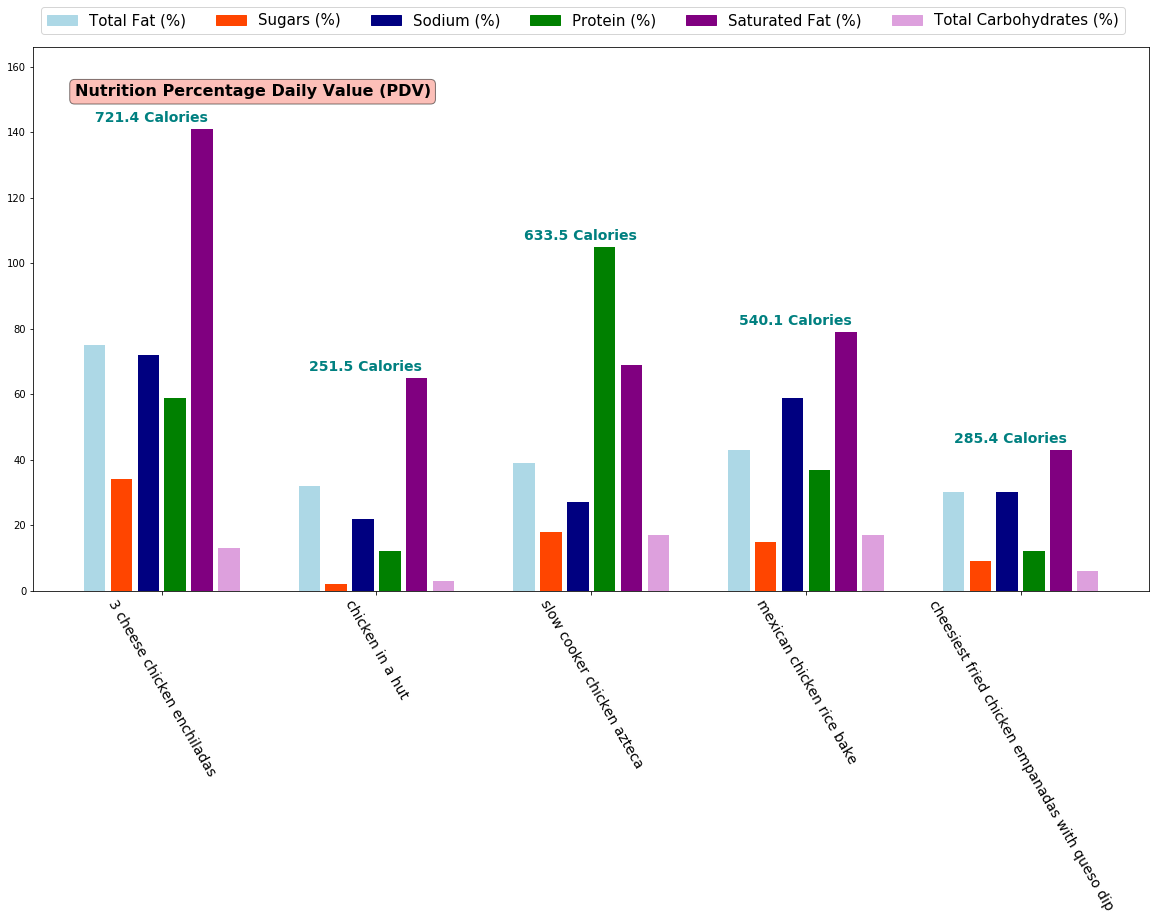

These are the top recipes found information. Enter the ID of the recipe you wish to make:
52186
Step 1: blend cottage cheese , cream cheese and sour cream until smooth

Step 2: add mixture to remaining ingredients except corn chips

Step 3: pour mixture into a shallow 2 qt

Step 4: baking dish

Step 5: sprinkle with tortilla chips

Step 6: bake at 350 for 25-30 minutes or till heated throughout



In [41]:
userChooseRecipe(getRecipes(['chicken','salt','cream cheese']),5,15)

In [36]:
#Nutritional Value SCORE(FIND A FORMULA to aggregate all nutrients data in list e.g. [24,53,32,54] -> score= 34)
#use this score to plot score vs time/nSteps (Basically graphs/FORMULAS to minimize effort,maximize nutrients)

# Turn everything to CLASS Attributes and Methods!!!! Set up to use with sublime text .py files of tesseract. Add graphs/data analysis useful info and then learn Django course... COME BACK ONE DAY TO ADD Image Recognition of ingredients and re run

# Generate pdf of top 3 rated recipes EDA data (e.g. Nutrition graph, rating of recipe, ADDITIONAL GRAPHS/Details for TOP 3 Nutrients that make up >30% of DRI)

# Generate pdf of pictures (Limit to TOP 50 RATED RECIPES (USE ratings data) SO DON'T FLOOD PDF) of All recipes GENERATED with their title